In [81]:
import numpy as np
import matplotlib.pyplot as plt 

In [82]:
# Model dimensional parameters
dt = 1 # set the ts step
Tmax = 400 # set the maximum ts
ts_seq = np.arange(0, Tmax+dt, dt) # sequence of ts values
depth = 20000 # n iterations of APD per ts value

# Experimental constants
A = 270
B1 = 2441
B2 = 90.02
T1 = 19.6
T2 = 200.5

DImin = 53.5
n = 1

x = np.zeros((depth+1, len(ts_seq)), dtype=np.float64) #preallocate the solution array. first row is the ts values, and the columns below it are all the solutions for that ts.
x[0,:] = ts_seq # first row of values is ts


def eqn1(x_i, ts, A, B1, B2, T1, T2):
    result = A - B1*np.exp((x_i-n*ts)/T1) - B2*np.exp((x_i-n*ts)/T2)
    if result < DImin:
        result = DImin
    return(result)

for ts in np.arange(len(x[0,:])):
    for i in np.arange(0, len(x[:,ts])-1):
        x[i+1,ts] = eqn1(x[i,ts], ts, A, B1, B2, T1, T2)
        

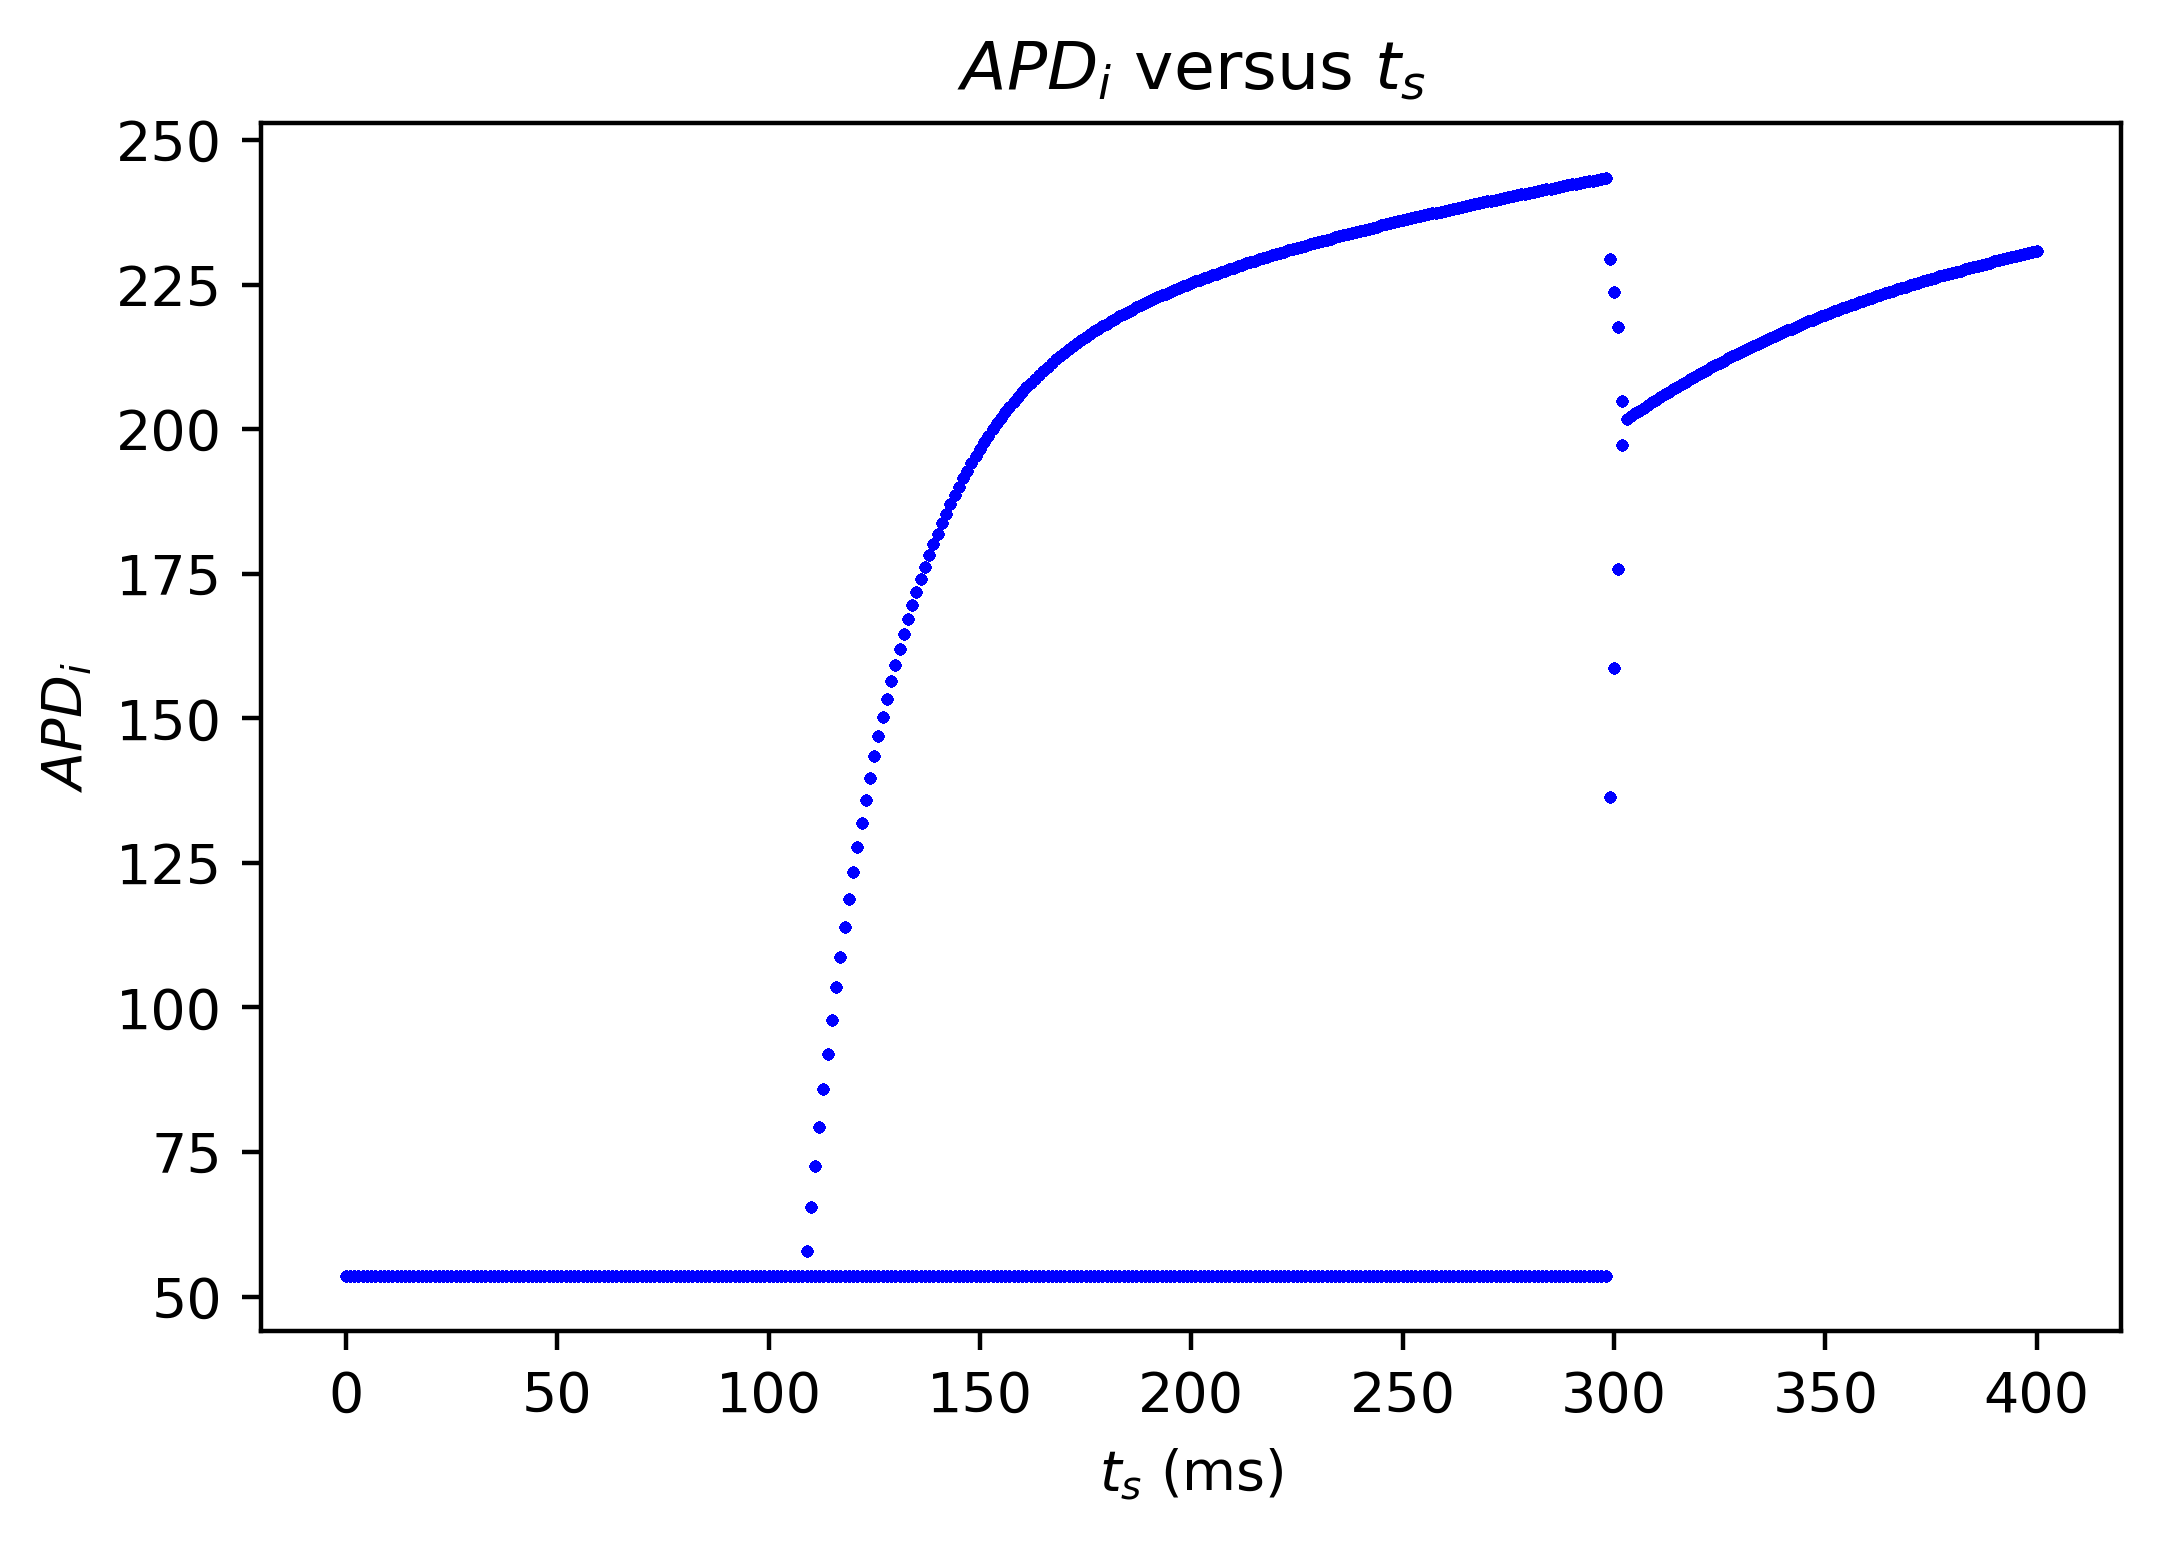

In [83]:
plt.figure(dpi=400)
lastn = 500 #include only last n from each run to filter out initial condition-dependent behavior
for row in np.arange(x.shape[0]-lastn, x.shape[0]):
    plt.scatter(x[0,:], x[row,:], c='b', s=1)
plt.title("$APD_i$ versus $t_s$")
plt.xlabel("$t_s$ (ms)")
plt.ylabel("$APD_i$")
plt.show()